In [67]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from utils import builder, grapher
import pickle
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
fd = pd.read_csv('data/model_final.csv')

df_90, df_10 = train_test_split(fd, test_size=0.1, random_state=42)  # Set random_state for reproducibility

df_90.to_csv("data/train_data.csv", index=False)  
df_10.to_csv("data/test_data.csv", index=False)

In [78]:
df = pd.read_csv('data/train_data.csv') #Get test data

feature_cols = ['hdg','ts1','lat_deg1','lon_deg1','altitude1','lat_deg2','lon_deg2','altitude2','distance_3d','wake_code'] #Poner columnas
target_cols = ['dif_t'] #Ponere target

context = df[feature_cols]
target = df[target_cols]

In [79]:
model_lr = builder.build_linear_regression(context, target)

with open('models/model_lr.plk', 'wb') as f:
    pickle.dump(model_lr, f)

model_rf = builder.build_random_forest(context, target)

with open('models/model_rf.plk', 'wb') as f:
    pickle.dump(model_rf, f)

model_hgbr = builder.build_hgbr(context, target)

with open('models/model_hgbr.plk', 'wb') as f:
    pickle.dump(model_hgbr, f)

model_xgbr = builder.build_xgbr(context, target)

with open('models/model_xgbr.plk', 'wb') as f:
    pickle.dump(model_xgbr, f)

d:\miniforge-pypy3\envs\hackathon\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\miniforge-pypy3\envs\hackathon\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
with open('models/model_lr.plk', 'rb') as f:
    model_lr = pickle.load(f)

with open('models/model_rf.plk', 'rb') as f:
    model_rf = pickle.load(f)

with open('models/model_hgbr.plk', 'rb') as f:
    model_hgbr = pickle.load(f)

with open('models/model_xgbr.plk', 'rb') as f:
    model_xgbr = pickle.load(f)

In [81]:
values_importance_lr = np.abs(model_lr.coef_)
values_importance_rf = model_rf.feature_importances_
variable_importance_xgbr = model_xgbr.get_booster().get_score(importance_type='weight')

In [82]:
perm_importance = permutation_importance(model_hgbr, context, target, n_repeats=10, random_state=42)

values_importance_hgbr = perm_importance.importances_mean

In [83]:
importance_lr = values_importance_lr / values_importance_lr.sum()
importance_rf = values_importance_rf / values_importance_rf.sum()
importance_hgbr = values_importance_hgbr / values_importance_hgbr.sum()

In [84]:
values = np.array(list(variable_importance_xgbr.values()))
importance_xgbr = values / values.sum()

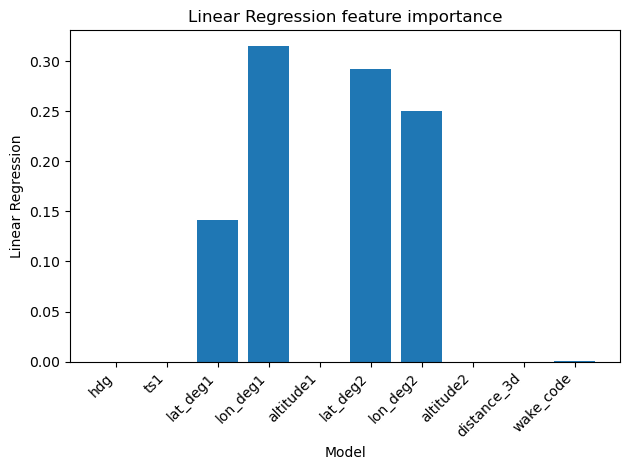

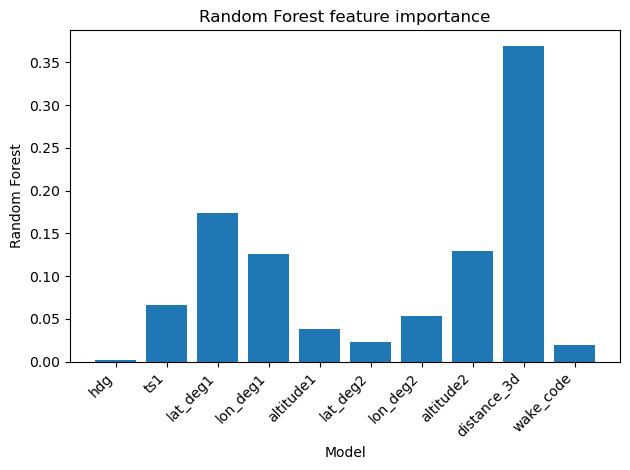

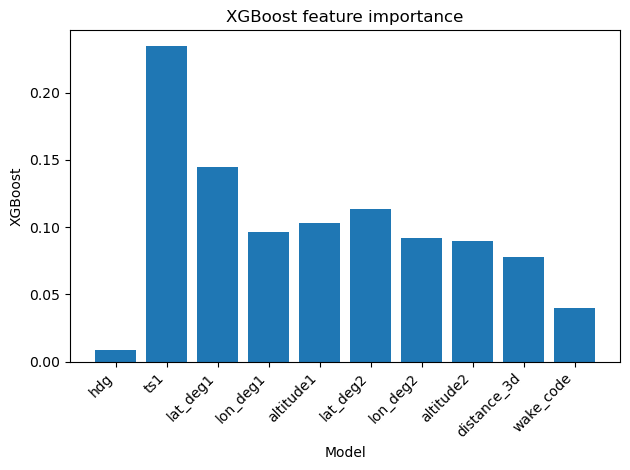

In [85]:
grapher.plot_metrics_bar_v2(importance_lr.reshape(-1), feature_cols, 'Linear Regression')
grapher.plot_metrics_bar_v2(importance_rf.reshape(-1), feature_cols, 'Random Forest')
#grapher.plot_metrics_bar_v2(importance_hgbr.reshape(-1), feature_cols, 'HistogramGradientBoosting')
grapher.plot_metrics_bar_v2(importance_xgbr, feature_cols, 'XGBoost')